[1984  716 3561 1508   83 2131  447   49 2567 1297  868 1990 1750  873
 3634  644 3305 2901 3469 2191 1326 2512 1792 2819 2242 2770  475 1255
 1361  610  239  941  470 2804 1686 1881 1585  177  404 1491 1451  801
 1776 1408 3165 2750 2919 1933 2098  704 1710 3544 1514  904 1094  739
 2999  947  160 2530 2405 1146 3589 2450   63 3625 2840 1005  327  278
  946  721 2545 2069 3118 3267  108 2891 1524 2313 1741 1864  747 3129
 1705 1659 1045  225 2968 1127  658]


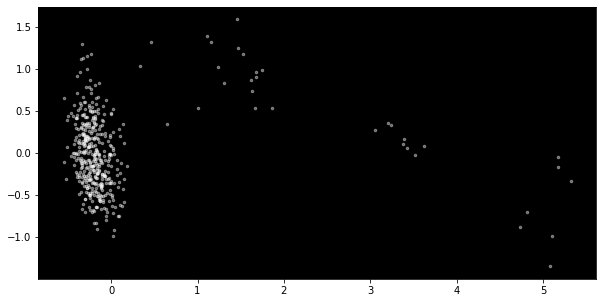

In [59]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
f1=open('bing.txt','r')#疾病结点
f2=open('fang.txt','r')#方剂结点

line1=f1.readlines()
line2=f2.readlines()
bi=[]
for line in line1:
    line=line.replace('\n','')#换行符换为空格
    x=line.split(' ')#再以空格为分隔符
    bi.append(x)#添加


fa=[]#同样操作
for line in line2:
    line=line.replace('\n','')
    x=line.split(' ')
    fa.append(x)


import numpy as np#矩阵化

bi_a=np.array(bi)

fa_a=np.array(fa)


label1=bi_a[:,0]#取出所有第0列的元素


fe1=bi_a[:,1:]#取出第1列以后的元素
fe1= fe1.astype(np.float64)#数据类型
label1= label1.astype(np.int)#0列元素类型


label2=fa_a[:,0]#同样的操作
fe2=fa_a[:,1:]
fe2= fe2.astype(np.float64)
label2= label2.astype(np.int)


from sklearn.model_selection import train_test_split#划分数据集

train_X,test_X, train_y, test_y = train_test_split(fe1,label1,test_size=0.2)#28开，向量信息->结点信息

print(test_y)
from sklearn.decomposition import PCA
# 利用PCA算法进行降维
X_reduced = PCA(n_components=2).fit_transform(fe1)


# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (10, 5))
ax = fig.gca()
ax.set_facecolor('black')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 5, alpha = 0.4, color = 'white')

In [60]:
from math import sqrt

'''
def knn(x,k):#对相应的药方进行knn
    dis=[sqrt(np.sum((g-x)**2))for g in fe2]#欧氏距离计算
    nearest=np.argsort(dis)#元素从小到大排列，提取其对应的index
    topK_k=[label2[i] for i in nearest[:k]]#得到对应的index
    #print(topK_k)
    p=0
    ans =[]
    print('匹配的药方如下：')
    for h in nearest[:k]:
        print(topK_k[p],'欧式距离是：',dis[h])
        ans.append(topK_k[p])
        p = p + 1
    return ans 
'''
from sklearn.neighbors import NearestNeighbors
def knn(x):
    samples=(fe2)#方剂的向量
    NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=20, p=2, radius=1.0)
    neigh = NearestNeighbors(n_neighbors=20)
    neigh.fit(samples)
    ans=neigh.kneighbors([x])#疾病的向量
    top=[]
    for s in range(20):
        top.append(ans[1][0][s])        
    topK_k=[label2[i] for i in top]#得到对应的index
    #print(topK_k)
    p=0
    print('匹配的药方如下：')
    print(topK_k)
    print('欧式距离是：',ans[0][0])
    return topK_k

In [61]:
err=0
predicted =[]
j=0
ll=list(fe2)
te=list(test_X)#相应的测试集，fe和lable
ty=list(test_y)
f4=open('graph_edges_bing-fang-relation.txt','r')

dic={}
all1=[]
set1=set()
set2=set()
lines=f4.readlines()#获取对应关系
for line in lines:
    line=line.replace('\n','')
    x=line.split(' ')
    set1.add(x[0])
    set2.add(x[1])
    all1.append(x)
print(len(set1))
print(len(set2))

for k in set2:
    v=[]
    for i in all1:
        if k in i:
            v.append(i[0])
    dic[k]=v
j=0
test_X=list(test_X)
ri=0
for x in test_X:
    print('*************',j,'*************')
    print(test_y[j])
    ans=knn(x)#对测试集方剂找出所有15个最相似
    # fang=[]
    fang=dic.get(str(test_y[j]))
    fang=list(map(int,fang))
    print('该病对应的全部药方是：',fang)
    print('推荐的全部药方是：',ans)
    ins=list(set(fang).intersection(set(ans)))
    if(len(ins)!=0):
        ri=ri+1
    j=j+1
print("test 个数为：",len(test_X))
print("hit 个数为：",ri)
print("命中率为：",ri/len(test_X))

1709
451
************* 0 *************
1984
匹配的药方如下：
[1983, 2529, 487, 2001, 3339, 1568, 222, 2726, 3069, 3448, 3568, 1323, 2086, 2686, 2587, 3577, 2499, 2511, 1300, 1702]
欧式距离是： [1.23170245 2.26395994 2.44016365 2.45315698 2.45342385 2.45454754
 2.46847528 2.49709909 2.49858112 2.50269792 2.51108327 2.51985417
 2.52990259 2.53838893 2.54183897 2.55149306 2.55225014 2.56146151
 2.5617091  2.56752691]
该病对应的全部药方是： [1983, 2686]
推荐的全部药方是： [1983, 2529, 487, 2001, 3339, 1568, 222, 2726, 3069, 3448, 3568, 1323, 2086, 2686, 2587, 3577, 2499, 2511, 1300, 1702]
************* 1 *************
716
匹配的药方如下：
[2876, 3069, 1634, 3577, 1267, 2230, 2511, 454, 1702, 2484, 487, 1632, 3448, 2119, 3024, 2001, 1523, 2385, 1323, 3196]
欧式距离是： [2.1373443  2.26259606 2.27316563 2.28152869 2.40686825 2.42496878
 2.43686654 2.45670318 2.50278862 2.53104715 2.53343429 2.53721296
 2.54361992 2.56623643 2.57536597 2.58427458 2.60173645 2.603644
 2.60367893 2.61599794]
该病对应的全部药方是： [715]
推荐的全部药方是： [2876, 3069, 1634, 357

匹配的药方如下：
[1254, 2119, 2499, 1632, 3560, 454, 3101, 1323, 1300, 910, 738, 3344, 2587, 3117, 1702, 59, 1007, 1634, 2230, 3069]
欧式距离是： [2.07391933 2.22028367 2.26980029 2.35102409 2.38626784 2.4042262
 2.45218628 2.4533133  2.47417748 2.48239712 2.48823752 2.493841
 2.495376   2.51117244 2.53821024 2.54944822 2.55752777 2.56586533
 2.57364859 2.57984277]
该病对应的全部药方是： [1254]
推荐的全部药方是： [1254, 2119, 2499, 1632, 3560, 454, 3101, 1323, 1300, 910, 738, 3344, 2587, 3117, 1702, 59, 1007, 1634, 2230, 3069]
************* 28 *************
1361
匹配的药方如下：
[1702, 882, 1632, 2806, 222, 1360, 2933, 3117, 3560, 1634, 2385, 1523, 3069, 454, 2736, 2001, 2511, 487, 738, 2771]
欧式距离是： [2.33948602 2.34123865 2.35844069 2.39522691 2.39984386 2.43991878
 2.44540245 2.45367883 2.47489386 2.47612652 2.48496322 2.50652172
 2.5068348  2.51016349 2.51392279 2.51464502 2.52283786 2.53017088
 2.54623845 2.54886649]
该病对应的全部药方是： [1360]
推荐的全部药方是： [1702, 882, 1632, 2806, 222, 1360, 2933, 3117, 3560, 1634, 2385, 1523, 3069, 45

匹配的药方如下：
[3096, 3064, 1138, 2511, 1632, 487, 2230, 2001, 1684, 3577, 1004, 2833, 1634, 3069, 2499, 529, 1704, 3117, 3013, 3448]
欧式距离是： [2.22524707 2.23247347 2.26324272 2.27860721 2.2848148  2.30724456
 2.32959574 2.33468007 2.35389186 2.35528108 2.36295568 2.3632272
 2.37012374 2.37774644 2.38663552 2.3889507  2.42189002 2.42569733
 2.43576607 2.43971902]
该病对应的全部药方是： [1004]
推荐的全部药方是： [3096, 3064, 1138, 2511, 1632, 487, 2230, 2001, 1684, 3577, 1004, 2833, 1634, 3069, 2499, 529, 1704, 3117, 3013, 3448]
************* 68 *************
327
匹配的药方如下：
[1702, 2001, 2230, 2253, 1523, 3560, 2511, 1568, 326, 3080, 2529, 3096, 738, 2385, 3069, 2771, 1138, 3101, 222, 1162]
欧式距离是： [2.18025462 2.23856202 2.33716293 2.4078233  2.40800416 2.41470102
 2.44090367 2.4696174  2.47244632 2.4806884  2.49460662 2.5329639
 2.53420832 2.56523395 2.57240489 2.57899228 2.58649487 2.58782152
 2.5879695  2.58807154]
该病对应的全部药方是： [326]
推荐的全部药方是： [1702, 2001, 2230, 2253, 1523, 3560, 2511, 1568, 326, 3080, 2529, 3096, 